In [1]:
## Dataset link -https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants?resource=download&select=zomato.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('../../../Downloads/zomato.csv')

Columns Description
1. url contains the url of the restaurant in the zomato website
2. address contains the address of the restaurant in Bengaluru
3. name contains the name of the restaurant
4. online_order whether online ordering is available in the restaurant or not
5. book_table table book option available or not
6. rate contains the overall rating of the restaurant out of 5
7. votes contains total number of rating for the restaurant as of the above mentioned date
8. phone contains the phone number of the restaurant
9. location contains the neighborhood in which the restaurant is located
10. rest_type restaurant type
11. dish_liked dishes people liked in the restaurant
12. cuisines food styles, separated by comma
13. approx_cost(for two people) contains the approximate cost of meal for two people
14. reviews_list list of tuples containing reviews for the restaurant, each tuple
15. menu_item contains list of menus available in the restaurant
16. listed_in(type) type of meal
17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [5]:
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
# lets find the features with null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
## deleting the unecessary columns

df.drop(['url','address','phone','reviews_list'],axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [10]:
## checking for Duplicates

df.duplicated().sum()

87

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()  # now it becomes 0

0

In [13]:
## lets drop null values
df.dropna(how='any', inplace=True)

In [14]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [15]:
## we see no null values now

In [16]:
## renaming some columns

df= df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                      'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'menu_item', 'type',
       'city'],
      dtype='object')

In [17]:
## lets clean the data
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [18]:
# lets remove the comma 
df['cost'] = df['cost'].str.replace(',','')
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [19]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
## lets remove NEW
df = df.loc[df['rate']!='NEW']


In [21]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
df['rate'] = df['rate'].str.replace('/5','')
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23227 entries, 0 to 51715
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          23227 non-null  object
 1   online_order  23227 non-null  object
 2   book_table    23227 non-null  object
 3   rate          23227 non-null  object
 4   votes         23227 non-null  int64 
 5   location      23227 non-null  object
 6   rest_type     23227 non-null  object
 7   dish_liked    23227 non-null  object
 8   cuisines      23227 non-null  object
 9   cost          23227 non-null  object
 10  menu_item     23227 non-null  object
 11  type          23227 non-null  object
 12  city          23227 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.5+ MB


Data Visualizations

<Figure size 1440x720 with 0 Axes>

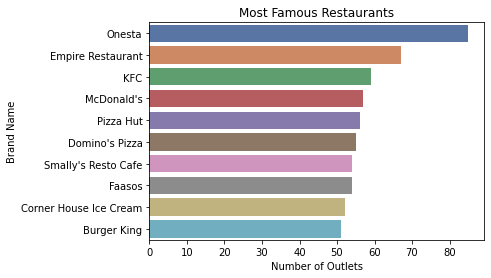

<Figure size 1440x720 with 0 Axes>

In [24]:
## lets plot the most famous restaurants
restro = df['name'].value_counts()[:10]      # top 10
sns.barplot(x=restro,y=restro.index,palette='deep')
plt.title("Most Famous Restaurants")
plt.xlabel("Number of Outlets")
plt.ylabel("Brand Name")
plt.figure(figsize=(20,10))

Text(0.5, 1.0, 'Check For Table Booking')

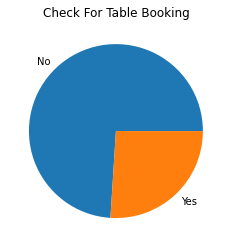

In [25]:
## lets check whether restaurant offer Table booking or not

x = df['book_table'].value_counts()
plt.pie(x,labels=x.index)
plt.title("Check For Table Booking")

In [26]:
## observation - we see majority of Restaurants dont offer table booking

In [27]:
## lets check whether Restaurants deliver online or not

df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

<BarContainer object of 2 artists>

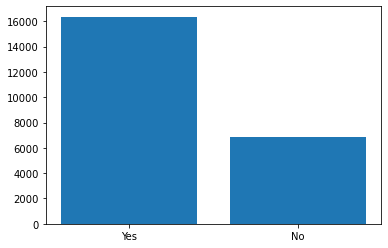

In [28]:
online = df['online_order'].value_counts()
plt.bar(online.index,online)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

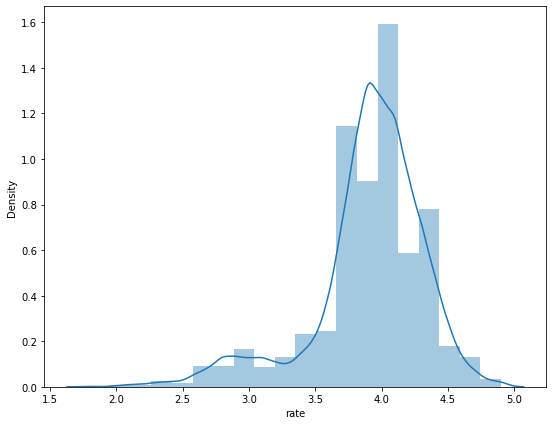

In [29]:
## lets check the rating distributions

plt.figure(figsize=(9,7))

sns.distplot(df['rate'],bins=20)

In [30]:
## observation - we see most of the rating is between 3.5 to 4.5
## also we can see there is a Distribution like Gaussian Distribution

In [31]:
## coverting rating into float datatype
df['rate'] = df['rate'].astype(float)

In [32]:
## finding total number of ratings between 1 and 2
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [33]:
## finding total number of ratings between 2 and 3
((df['rate']>=2) & (df['rate']<3)).sum()

1178

In [34]:
## finding total number of ratings between 3 and 4
((df['rate']>=3) & (df['rate']<4)).sum()

10151

In [35]:
## finding total number of ratings above 4
(df['rate'] >= 4).sum()

11893

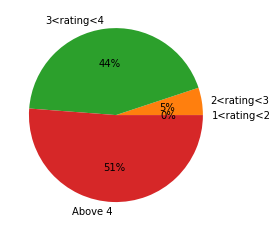

In [36]:
## plotting the rating count

slices = [((df['rate']>=1) & (df['rate']<2)).sum(),
((df['rate']>=2) & (df['rate']<3)).sum(),
((df['rate']>=3) & (df['rate']<4)).sum(),
(df['rate'] >= 4).sum()
]
labels = ['1<rating<2','2<rating<3','3<rating<4','Above 4']
plt.pie(slices,labels=labels, autopct='%1.0f%%')
plt.show()


Lets check the type of service provided

<Figure size 2160x1440 with 0 Axes>

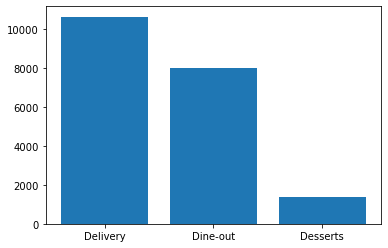

<Figure size 2160x1440 with 0 Axes>

In [37]:
## lets check top 3 services

val = df['type'].value_counts()[:3]
plt.bar(val.index,val)
plt.figure(figsize=(30,20))

In [38]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [39]:
df['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51705    Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...
51707                                     Rooftop Ambience
51708    Salads, Coffee, Breakfast Buffet, Halwa, Chick...
51711                                 Biryani, Andhra Meal
51715                         Cocktails, Pizza, Buttermilk
Name: dish_liked, Length: 23227, dtype: object

Lets find the most liked dishes

In [40]:
#importing regular expressions
import re

df.index = range(df.shape[0])
likes = []
for i in range(df.shape[0]):
    array_split = re.split(',',df['dish_liked'][i])
    for items in array_split:
        likes.append(items)

In [41]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(20)

Count of Most liked dishes in Bangalore


 Pasta              2687
 Pizza              1909
 Cocktails          1871
 Burgers            1734
 Mocktails          1615
 Biryani            1306
 Sandwiches         1287
Burgers             1255
 Coffee             1184
 Nachos             1167
 Fish               1115
 Paratha            1107
 Salads             1053
 Chicken Biryani    1004
Cocktails            887
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 818
dtype: int64

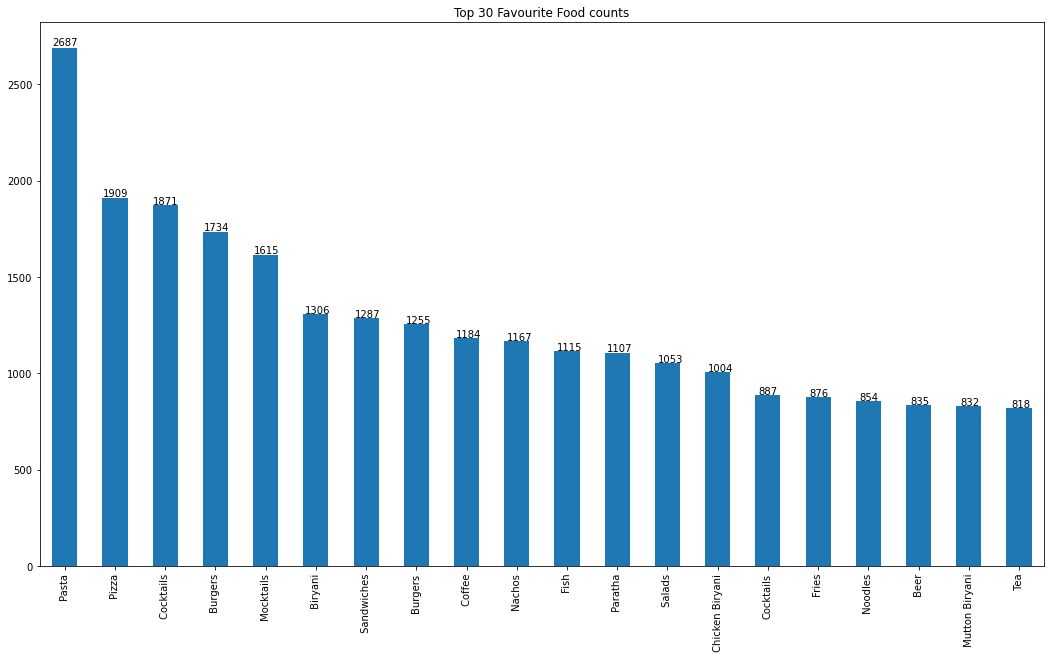

In [42]:
## lets plot it
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(18,10),title = 'Top 30 Favourite Food counts')

for i in ax.patches:
    ax.annotate(str(i.get_height()),(i.get_x()*1.005, i.get_height()*1.005))

In [43]:
## observation - Pasta and pizza is the most loved item 

<BarContainer object of 20 artists>

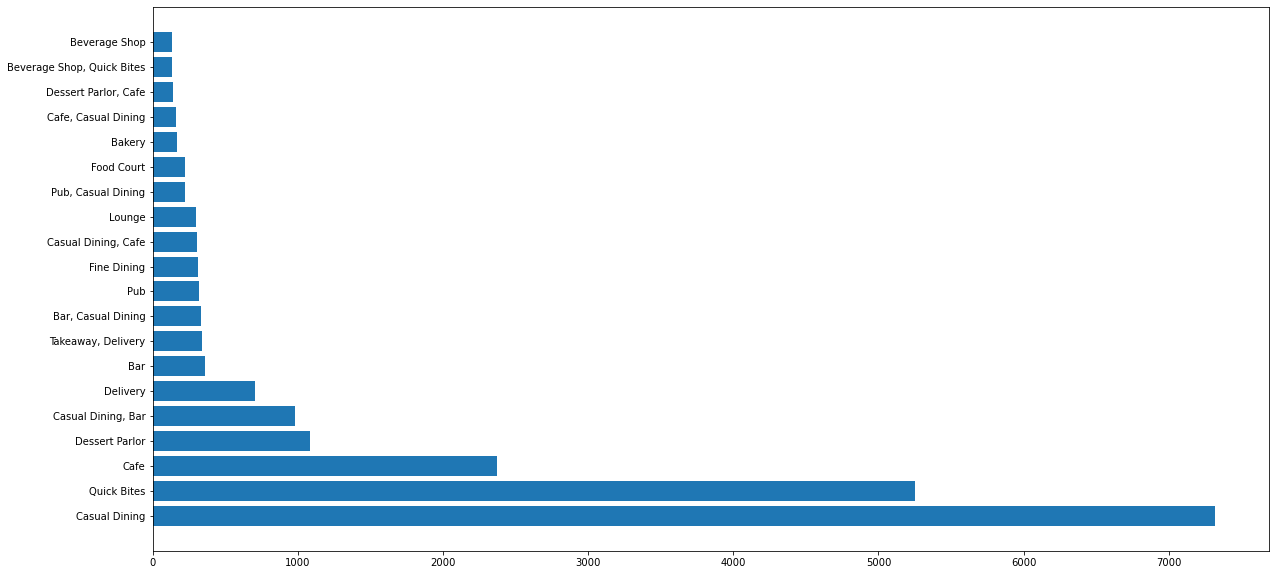

In [44]:
## lets plot Restaurant and their counts

rest = df['rest_type'].value_counts()[:20]
plt.figure(figsize=(20,10))
plt.barh(rest.index,rest)

In [45]:
## observation --  Casual Dining , Quick Bites and Cafe are most popular

Lets start model building


In [46]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [47]:
df.drop(['dish_liked'],axis=1,inplace=True)

In [48]:
## lets do label ecoding as we have most of the data as object type

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
li = ['online_order','book_table','rest_type','cuisines','city','location','menu_item']
for i in li:
    df[i] = le.fit_transform(df[i])
    
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,type,city
0,Jalsa,1,1,4.1,775,1,20,1386,800,5047,Buffet,1
1,Spice Elephant,1,0,4.1,787,1,20,594,800,5047,Buffet,1
2,San Churro Cafe,1,0,3.8,918,1,16,484,800,5047,Buffet,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,62,1587,300,5047,Buffet,1
4,Grand Village,0,0,3.8,166,4,20,1406,600,5047,Buffet,1


In [50]:
my_data=df.iloc[:,[1,2,4,5,6,8]]
my_data.to_csv('Zomato_data.csv',index=False)


In [51]:
X = df.iloc[:,[1,2,4,5,6,8]]

In [52]:
X.head()

,online_order,book_table,votes,location,rest_type,cost
0,1,1,775,1,20,800
1,1,0,787,1,20,800
2,1,0,918,1,16,800
3,0,0,88,1,62,300
4,0,0,166,4,20,600


In [53]:
y = df['rate'].values

In [54]:
y

array([4.1, 4.1, 3.8, ..., 2.8, 2.5, 4.3])

In [55]:
## Splitting Data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [56]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18581, 6), (4646, 6), (18581,), (4646,))

# Applying Regression Models

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor

LinearRegression()

In [58]:
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [59]:
lin_predict = lin_regressor.predict(X_test)

In [60]:
lin_predict

array([3.81994834, 3.80331554, 3.79185422, ..., 3.83627265, 3.78078948,
       3.78741953])

In [61]:
from sklearn.metrics import r2_score


In [62]:
lin_regressor_score = r2_score(y_test,lin_predict)*100
print("Accuracy Score for Linear Regression is: ",lin_regressor_score)

Accuracy Score for Linear Regression is:  22.301022159051076


# Ridge Regression

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [64]:
ridge = Ridge()

In [65]:
parameters = {"alpha":[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}

In [66]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
ridge_regressor_predict = ridge_regressor.predict(X_test)

In [68]:
ridge_regressor_score = r2_score(y_test,ridge_regressor_predict)*100
print("Accuracy for Ridge Regression is:",ridge_regressor_score)

Accuracy for Ridge Regression is: 22.301738752091328


# Lasso Regression

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [70]:
lasso = Lasso()

In [71]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [72]:
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 981.7186072343106, tolerance: 0.275260960376724
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [73]:
lasso_regressor_predict = lasso_regressor.predict(X_test)

In [74]:
lasso_regressor_score = r2_score(y_test,lasso_regressor_predict)*100

In [75]:
print("Accuracy for Lasso Regression is: ",lasso_regressor_score)

Accuracy for Lasso Regression is:  22.30102209244016


#  ElasticNet Regression

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [77]:
elastic = ElasticNet()

In [78]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [79]:
elasticnet_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607.9366466386834, tolerance: 0.27049010226049497
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1007.7759800456901, tolerance: 0.27109769458459476
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1053.1571041889827, tolerance: 0.275260960376724
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: Convergence

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [80]:
elasticnet_regressor_predict = elasticnet_regressor.predict(X_test)

In [81]:
elasticnet_regressor_score = r2_score(y_test,elasticnet_regressor_predict)*100

In [82]:
print("Accuracy for Elasticnet Regression is:",elasticnet_regressor_score)

Accuracy for Elasticnet Regression is: 22.301022139346127


# KNN Regressor

In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [85]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [86]:
knn_regressor_predict = knn_regressor.predict(X_test)

In [87]:
knn_regressor_score = r2_score(y_test,knn_regressor_predict)*100

In [88]:
print("Accuracy for KNN is:",knn_regressor_score)

Accuracy for KNN is: 68.76251218471879


# Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
decisiontree_regressor = DecisionTreeRegressor(random_state=0)

In [91]:
decisiontree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [92]:
decisiontree_regressor_predict = decisiontree_regressor.predict(X_test)

In [93]:
decisiontree_regressor_score = r2_score(y_test,decisiontree_regressor_predict)*100

In [94]:
print("Accuracy for Decision Tree is:",decisiontree_regressor_score)

Accuracy for Decision Tree is: 86.82038462832632


# Support Vector Regressor

In [95]:
from sklearn.svm import SVR

In [96]:
sv_regressor = SVR()

In [97]:
sv_regressor.fit(X_train,y_train)

SVR()

In [98]:
sv_regressor_predict = sv_regressor.predict(X_test)

In [99]:
sv_regressor_score = r2_score(y_test,sv_regressor_predict)*100

In [100]:
print("Accuracy for Support Vector Regressor is:",sv_regressor_score)

Accuracy for Support Vector Regressor is: 25.643548554015794


# Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
randomforest_regressor = RandomForestRegressor()

In [103]:
randomforest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [104]:
randomforest_regressor_predict = randomforest_regressor.predict(X_test)

In [105]:
randomforest_regressor_score = r2_score(y_test,randomforest_regressor_predict)*100

In [106]:
print("Accuracy for Random Forest is:",randomforest_regressor_score)

Accuracy for Random Forest is: 89.7286012189291


# Extra Tree Regressor

In [107]:
from sklearn.ensemble import ExtraTreesRegressor

In [108]:
extratree_regressor = ExtraTreesRegressor()

In [109]:
extratree_regressor.fit(X_train,y_train)

ExtraTreesRegressor()

In [110]:
extratree_regressor_predict = extratree_regressor.predict(X_test)

In [111]:
extratree_regressor_score = r2_score(y_test,extratree_regressor_predict)*100

In [112]:
print("Accuracy for Extra Tree Regressor is:",extratree_regressor_score)

Accuracy for Extra Tree Regressor is: 91.2538129932852


# Adaboost Regressor

In [113]:
from sklearn.ensemble import AdaBoostRegressor

In [114]:
adaboost_regressor = AdaBoostRegressor()

In [115]:
adaboost_regressor.fit(X_train,y_train)

AdaBoostRegressor()

In [116]:
adaboost_regressor_predict = adaboost_regressor.predict(X_test)

In [117]:
adaboost_regressor_score = r2_score(y_test,adaboost_regressor_predict)*100

In [118]:
print("Accuracy for Adaboost Regressor is:",adaboost_regressor_score)

Accuracy for Adaboost Regressor is: 15.710232033200022


# Gradient Boost Regressor

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
gradient_regressor = GradientBoostingRegressor()

In [121]:
gradient_regressor.fit(X_train,y_train)

GradientBoostingRegressor()

In [122]:
gradient_regressor_predict = gradient_regressor.predict(X_test)

In [123]:
gradient_regressor_socre = r2_score(y_test,gradient_regressor_predict)*100

In [124]:
print("Accuracy for Gradient Boost regressor is:",gradient_regressor_socre)

Accuracy for Gradient Boost regressor is: 39.99138842302323


# Comparing actual rating with the predicted rating

In [125]:
comp = pd.DataFrame({"Actual":y_test,"Predicted":np.round(extratree_regressor_predict,2)})
comp

,Actual,Predicted
0,4.3,4.28
1,4.0,4.00
2,3.9,3.90
3,4.1,4.10
4,4.1,4.10
...,...,...
4641,3.7,3.70
4642,4.1,4.10
4643,3.8,3.83
4644,4.0,4.00


In [126]:
## model is working good

In [127]:
## Saving the comparision in csv file 

comp.to_csv("Model_prediction_sample.csv",index=False)

# Creating Pickle File

In [128]:
import pickle
pickle.dump(extratree_regressor,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))